# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#Creat url for API call
url = "https://api.openweathermap.org/data/2.5/weather?"

#Create lists to append API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
temp_max = []
speed = []

#Loop to get the city data
for city in cities:
    query_url = url + "q=" + city + "&appid=" + api_key 
    response = requests.get(query_url).json()
    #if response['cod'] == 200:
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
        print(f"Processing record {city}")
    #else:
    except:
        print("City not found. Skipping...")

Processing record labuhan
City not found. Skipping...
Processing record havelock
Processing record hobart
Processing record gatton
Processing record carnarvon
Processing record jamestown
Processing record kadaya
Processing record butaritari
Processing record puerto ayora
Processing record ornskoldsvik
City not found. Skipping...
Processing record leningradskiy
Processing record omboue
Processing record rikitea
Processing record barrow
Processing record gat
Processing record tuatapere
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record adrar
Processing record malanje
Processing record saint-philippe
Processing record sumenep
Processing record vaini
Processing record pisco
Processing record albany
Processing record ushuaia
Processing record rawson
Processing record egvekinot
Processing record lufilufi
Processing record atuona
Processing record grand forks
Processing record bethel
City not found. Skipping...
Processing record passo de cama

Processing record half moon bay
Processing record aguimes
Processing record klichka
Processing record mehamn
Processing record sarany
Processing record laguna
Processing record governador valadares
Processing record avera
City not found. Skipping...
Processing record nyuksenitsa
Processing record oranjemund
Processing record nabire
Processing record langenburg
Processing record kavadarci
Processing record tartagal
Processing record hokitika
Processing record cherskiy
Processing record winfield
Processing record geraldton
Processing record hirara
Processing record baherden
Processing record atasu
Processing record parana
Processing record praxedis guerrero
Processing record ribeira grande
Processing record puerto colombia
Processing record atascadero
Processing record bambanglipuro
Processing record nicoya
Processing record kuala lipis
Processing record pizhanka
Processing record syamzha
Processing record coquimbo
Processing record siocon
Processing record sagauli
City not found. Skippi

Processing record puerto del rosario
Processing record kieta
Processing record terme
Processing record mufumbwe
Processing record atherton
Processing record brigantine
Processing record erie
Processing record bay roberts
Processing record eldama ravine
Processing record pechora
Processing record kamenka
Processing record kenai
Processing record san francisco
Processing record pingdingshan
Processing record karymskoye
Processing record mount gambier
Processing record pascagoula
Processing record matamoros


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_dic = {
    'City': city_name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': temp_max,
    'Wind Speed': speed
}

weather_df = pd.DataFrame(weather_dic)

In [24]:
weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [25]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Labuhan,100,ID,1563387556,90,-2.54,115.51,295.364,0.49
1,Havelock,1,US,1563387475,56,34.88,-76.90,308.150,4.10
2,Hobart,75,AU,1563387285,65,-42.88,147.33,281.150,5.10
3,Gatton,0,AU,1563387558,92,-27.56,152.28,285.370,1.00
4,Carnarvon,1,ZA,1563387090,12,-30.97,22.13,285.064,3.31


In [32]:
# Save dataframe to CSV
weather_df.to_csv('output_data/cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

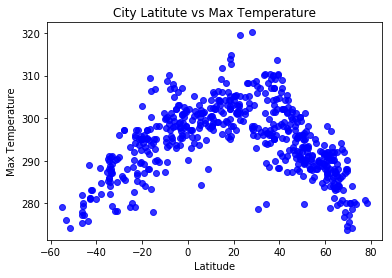

In [26]:
#Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", facecolors="blue", edgecolors="blue", alpha = 0.80)
# Incorporate the other graph properties
plt.title("City Latitute vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save Figure
plt.savefig("output_data/lat_vs_temp.png")

plt.show()

Temperature seems to be higher if the city latitute is near latitude 20, not in the equator line, as well the temperature drops if the latitute has more distance from the equator.

#### Latitude vs. Humidity Plot

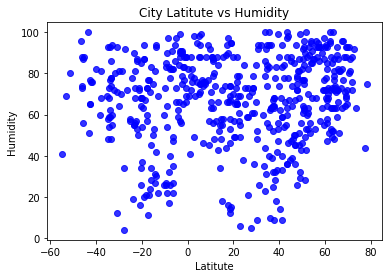

In [27]:
#Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", facecolors="blue", edgecolors="blue", alpha = 0.80)
# Incorporate the other graph properties
plt.title("City Latitute vs Humidity")
plt.xlabel("Latitute")
plt.ylabel("Humidity")

# Save Figure
plt.savefig("output_data/lat_vs_hum.png")

plt.show()

Humidity has no direct relation with the city latitude, theres humidity everywhere.

#### Latitude vs. Cloudiness Plot

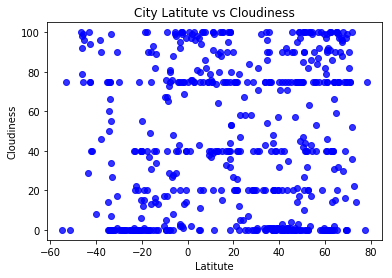

In [28]:
#Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="blue", alpha = 0.80)
# Incorporate the other graph properties
plt.title("City Latitute vs Cloudiness")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness")

# Save Figure
plt.savefig("output_data/lat_vs_cloud.png")

plt.show()

As well, cloudiness has no direct relation with the city latitude, its quite disperse.

#### Latitude vs. Wind Speed Plot

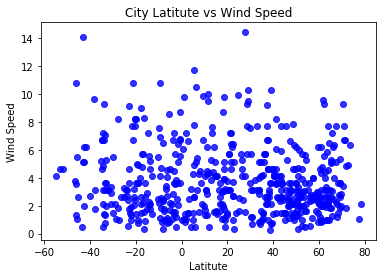

In [29]:
#Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="blue", alpha = 0.80)
# Incorporate the other graph properties
plt.title("City Latitute vs Wind Speed")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")

# Save Figure
plt.savefig("output_data/lat_vs_wind.png")

plt.show()

The wind speed seems to be faster at the north of the equator.